In [1]:
import datetime
import gantt
import math
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import planning
from calendarplot import create_year_calendar
import random
import sys

In [2]:
gantt.define_font_attributes(fill='black', stroke='black', stroke_width=0, font_family="Verdana")
gantt.NOT_WORKED_DAYS.clear()
gantt.VACATIONS.clear()

In [3]:
AOS_access_time = 0.75
Coordination_operator = 0.5
Safety_procedures = 0.5
AOS_extra_time = AOS_access_time + Coordination_operator + Safety_procedures
FTE_OSF = 1288
FTE_AOS = 512
arrayElementProject=[] 
feUpgradeProject=[]
AE_retrofit_at_AOS=True

In [4]:
atacStartDates={
'ATAC.R1_START' : datetime.date(2026, 7, 1),
'ATAC.R1_FIN'   : datetime.date(2027, 10, 1),
'ATAC.R2_START' : datetime.date(2027, 7, 1),
'ATAC.R2_FIN'   : datetime.date(2028, 7, 1)           
}

In [5]:
startDate=datetime.date(2026, 4, 16)
#reference dates
stage3startDate=datetime.date(2027, 1, 1)
stage2startDate=stage3startDate-datetime.timedelta(days=266)  
stage1startDate=stage2startDate-datetime.timedelta(days=34)  
stage0startDate=stage1startDate-datetime.timedelta(days=124)  



#stage4startDate=datetime.date(2027, 1, 1)
#stage5startDate=datetime.date(2027, 1, 1)
FEstartDate=stage2startDate

stage3verificationDuration=datetime.timedelta(days=90) 
overlappingShift=datetime.timedelta(days=8) 
number_of_FE_ready_to_be_retrofitted=4
FE_ready_to_be_retrofitted=[[stage0startDate,number_of_FE_ready_to_be_retrofitted]]

# Stage 0

## OCRO

In [6]:
listOfTasksOcro=[['0.13.AIV.EN','0.14.AIV.EN','0.15.AIV.EN','0.16.AIV.EN','0.17.AIV.EN','0.18.AIV.EN','0.19.AIV.EN'],1]
ocro=planning.createAntennaRetrofitTask(listOfTasksOcro[0],stage0startDate,'OCRO')
planning.printTasks(ocro)

 OCRO
# {color:red} 0.13.AIV.EN {color}		[#Check and validate the Electrical installation]
# {color:red} 0.14.AIV.EN {color}		[#Check and validate the HVAC performance]
# {color:red} 0.15.AIV.EN {color}		[#Check and validate the monitoring infrastructure (BMS). ]
# {color:red} 0.16.AIV.EN {color}		[#Check and validate the fire system protection]
# {color:red} 0.19.AIV.EN {color}		[#Check the anti-seismic structure]
# {color:red} 0.17.AIV.EN {color}		[#Check and validate the patch panel functionality]
# {color:red} 0.18.AIV.EN {color}		[#Check and validate the access control system]


## PSAD

In [7]:
listOfTasksPsad=[['0.05.AIV.EN','0.06.AIV.EN','0.07.AIV.EN'],1]
psad=planning.createAntennaRetrofitTask(listOfTasksPsad[0],stage0startDate,'PSAD')
planning.printTasks(psad)

 PSAD
# {color:red} 0.05.AIV.EN {color}		[#Design and prototype the new PSAD]
# {color:red} 0.06.AIV.EN {color}		[#Validate the new PSAD]
# {color:red} 0.07.AIV.EN {color}		[#Manufacturing the new PSAD]


## DTS

In [8]:
listOfTasksDts=[['0.08.AIV.EN','0.09.AIV.EN','0.10.AIV.EN'],1]
dts=planning.createAntennaRetrofitTask(listOfTasksDts[0],stage0startDate,'DTS')
planning.printTasks(dts)

 DTS
# {color:red} 0.08.AIV.EN {color}		[#Elaborate on the FO connectivity plan for linking the OSF pads to the ATAC]
# {color:red} 0.09.AIV.EN {color}		[#Patch Panel and the AOS-OSF fiber infrastructure upgrade ]
# {color:red} 0.10.AIV.EN {color}		[#Implement the FO connection between pads located at the OSF and the ATAC]


## DSO Preparation

In [9]:
listOfTasksDSOPreparation=[['0.01.AIV.SC','0.02.AIV.SC','0.03.AIV.SC','0.04.AIV.SC','0.5.AIV.SC',
                            '0.05.AIV.SC','0.07.AIV.SC','0.08.AIV.SC','0.09.AIV.SC','0.10.AIV.SC',
                            '0.11.AIV.SC','0.14.AIV.SC'],1]
DSOPreparation=planning.createAntennaRetrofitTask(listOfTasksDSOPreparation[0],stage0startDate,'DSO Preparation')
planning.printTasks(DSOPreparation)

 DSO Preparation
# {color:green} 0.01.AIV.SC {color}		[#Fast Switching Script Prep ]
# {color:green} 0.02.AIV.SC {color}		[#First Light Script Prep ]
# {color:green} 0.03.AIV.SC {color}		[#OTF Script Prep  ]
# {color:green} 0.04.AIV.SC {color}		[#Radio Pointing Script Prep ]
# {color:green} 0.5.AIV.SC {color}		[#Offset Pointing Script Prep]
# {color:green} 0.05.AIV.SC {color}		[#Beam Squint Script Prep ]
# {color:green} 0.07.AIV.SC {color}		[#Focus Curve Scrip Prep ]
# {color:green} 0.08.AIV.SC {color}		[#Spectral Check Script Prep ]
# {color:green} 0.09.AIV.SC {color}		[#Interferometric Checkout Script Prep ]
# {color:green} 0.10.AIV.SC {color}		[#Interferometric Focus Script Prep ]
# {color:green} 0.11.AIV.SC {color}		[#Interferometric Pointing Script Prep]
# {color:green} 0.14.AIV.SC {color}		[#Antenna Position Script Prep]


## Shared Array Elements

In [10]:
listOfTasksSharedArrayElementsUpgrade=[['0.11.AIV.EN','0.12.AIV.EN'],1]
sharedArrayElementsUpgrade=planning.createAntennaRetrofitTask(listOfTasksSharedArrayElementsUpgrade[0],stage0startDate,'Shared Array Elements')
planning.printTasks(sharedArrayElementsUpgrade)

 Shared Array Elements
# {color:red} 0.11.AIV.EN {color}		[#Increase the capacity of the Shared-resources from 4 to 8 Array Elements]
# {color:red} 0.12.AIV.EN {color}		[#Validate the increased Shared-resources capacity]


## Engineering Tasks

In [11]:
listOfTasksEngineeringPreparation=[['0.01.AIV.EN','0.02.AIV.EN','0.03.AIV.EN','0.04.AIV.EN'],1]
EngineeringPreparation=planning.createAntennaRetrofitTask(listOfTasksEngineeringPreparation[0],stage0startDate,'Engineering Preparation')
planning.printTasks(EngineeringPreparation)

 Engineering Preparation
# {color:red} 0.01.AIV.EN {color}		[#Provide a timing reference to the Array Elements sited at the OSF pads ]
# {color:red} 0.02.AIV.EN {color}		[#Prepare the OSF maintenance labs for conducting the PAS tests]
# {color:red} 0.03.AIV.EN {color}		[#Develop a DTX mockup]
# {color:red} 0.04.AIV.EN {color}		[#Elaborate a plan to modify the low-frequency timing reference signal distribution]


In [12]:
stage0 = gantt.Project(name='Stage-0')
stage0.add_task(ocro)
stage0.add_task(psad)
stage0.add_task(dts)
stage0.add_task(sharedArrayElementsUpgrade)
stage0.add_task(DSOPreparation)
stage0.add_task(EngineeringPreparation)
stage0.make_svg_for_tasks(filename='Gantt_chart_stage-0.svg', today=stage0.start_date(), scale=gantt.DRAW_WITH_DAILY_SCALE)
stage0Duration=stage0.end_date()-stage0.start_date()
planning.createStageSumaryTex([
    listOfTasksOcro,
    listOfTasksPsad,
    listOfTasksDts,
    listOfTasksSharedArrayElementsUpgrade],
    'Stage-0',
    stage0Duration.days)

194

In [13]:
original_stdout = sys.stdout
f=open('stage0-list-of-tasks.txt', 'w')
sys.stdout = f
planning.printTasks(stage0)
sys.stdout = original_stdout
f.close()

# ATAC

In [14]:
listOfTasksAtac=[['ATAC.R1_START','ATAC.R1_FIN','ATAC.R2_START','ATAC.R2_FIN'],1]
atac = gantt.Project(name='ATAC')
atac_tasks=[]
for i in listOfTasksAtac[0]:
    atac_tasks.append(gantt.Task(name=i,duration=planning.returnTaskDuration(i),resources=planning.returnTaskResources(i),start=atacStartDates.get(i)))    
for i in atac_tasks:
    atac.add_task(i)    
atac.make_svg_for_tasks(filename='Gantt_chart_ATAC.svg', today=atac.start_date(), scale=gantt.DRAW_WITH_WEEKLY_SCALE)
atacDuration=atac.end_date()-atac.start_date()    
planning.createStageSumaryTex([listOfTasksAtac],'ATAC',atacDuration.days)

360

In [15]:
original_stdout = sys.stdout
f=open('atac-list-of-tasks.txt', 'w')
sys.stdout = f
planning.printTasks(atac)
sys.stdout = original_stdout
f.close()

# Stage 1

In [16]:
listOfTasksStage1=[['1.01.AIV.EN','1.02.AIV.EN','1.03.AIV.EN'],1]
startDate=stage1startDate
stage1 = gantt.Project(name='Stage-1')
stage1_tasks=[]
for i in listOfTasksStage1[0]:
    stage1_tasks.append(gantt.Task(name=i,duration=planning.returnTaskDuration(i),resources=planning.returnTaskResources(i),start=startDate))
for i in stage1_tasks:
    stage1.add_task(i)
stage1.make_svg_for_tasks(filename='Gantt_chart_stage-1.svg', today=stage1.start_date(), scale=gantt.DRAW_WITH_DAILY_SCALE)
stage1Duration=stage1.end_date()-stage1.start_date()
planning.createStageSumaryTex([listOfTasksStage1],'Stage-1',stage1Duration.days)    


62

In [17]:
original_stdout = sys.stdout
f=open('stage1-list-of-tasks.txt', 'w')
sys.stdout = f
planning.printTasks(stage1)
sys.stdout = original_stdout
f.close()

# Stage 2

In [18]:
listOfTasksStage2=[
    [['2.09.AIV.EN','2.05.AIV.EN','2.03.AIV.EN'],1,'Pre-Stage-2',-1],
    [['2.01.AIV.EN','2.02.AIV.EN','2.04.AIV.EN','2.07.AIV.EN',
      '2.08.AIV.EN','2.10.AIV.EN','2.11.AIV.EN','2.12.AIV.EN',
      '2.01.AIV.SC','2.02.AIV.SC','2.03.AIV.SC','2.04.AIV.SC',
      '2.05.AIV.SC','2.06.AIV.SC','2.07.AIV.SC','2.08.AIV.SC',
      '2.09.AIV.SC','2.10.AIV.SC','2.11.AIV.SC','2.12.AIV.SC',
      '2.13.AIV.SC','2.14.AIV.SC','2.15.AIV.SC','2.13.AIV.EN'],5,'RAE',0,'2.04.AIV.EN'],
    [['2.09.AIV.EN'],1,'Post-Stage-2',-1],
]

nextDay=stage2startDate
stage2 = gantt.Project(name='Stage-2')
stage2Overlapping=-1

In [19]:
project = stage2
projectOverlapping=stage2Overlapping
listOfTasks=listOfTasksStage2

for setOfTask in listOfTasks:
    instances=1
    for i in range(setOfTask[1]):
        if setOfTask[1] != 1:
            if   setOfTask[2]=='RAE':
                indexString=str(len(arrayElementProject)+1)                
            elif setOfTask[2]=='FE Upgrade':     
                indexString=str(len(feUpgradeProject)+1)
            else:
                indexString=str(instances)
        else:
            indexString='' 
        a=planning.createAntennaRetrofitTask(setOfTask[0],nextDay,setOfTask[2]+'-'+indexString)
        
        if setOfTask[2]!='FE Upgrade':
            project.add_task(a)
        else:    
            FEUpgrade.add_task(a)
        
        if setOfTask[2]=='RAE':
            arrayElementProject.append(a)
        if setOfTask[2]=='FE Upgrade':
            feUpgradeProject.append(a)    
            
        projectOverlapping = setOfTask[3]
        
        if projectOverlapping == -1:     
            nextDay=a.end_date()+datetime.timedelta(days=1)     
            
        elif projectOverlapping == 0:          
            temp=a.tasks
            nextDay=a.end_date()+datetime.timedelta(days=1)
            for i in temp:
                if i.name == setOfTask[4]:
                    nextDay=i.end_date() + datetime.timedelta(days=1)                                               
        else:
            nextDay=a.start_date()+datetime.timedelta(days=projectOverlapping)               
            
            
        if setOfTask[1] != 1:
            instances=1+instances
            
stage2Duration=stage2.end_date()-stage2.start_date()
planning.createStageSumaryTex(listOfTasksStage2,'Stage-2',stage2Duration.days)
stage2.make_svg_for_tasks(filename='Gantt_chart_stage-2.svg', today=stage2.start_date(), scale=gantt.DRAW_WITH_WEEKLY_SCALE)            
arrayElementProject[-1].make_svg_for_tasks(filename='Gantt_chart_stage-2-AE.svg', today=arrayElementProject[-1].start_date(), scale=gantt.DRAW_WITH_DAILY_SCALE)            

In [20]:
original_stdout = sys.stdout
f=open('stage2-list-of-tasks.txt', 'w')
sys.stdout = f
planning.printTasks(stage2)
sys.stdout = original_stdout
f.close()

# Stage 3

In [21]:
listOfTasksStage3=[
    #[['3.04.AIV.EN'],4,'AE Relocation AOS -> OSF'],
    [['3.01.AIV.EN','3.02.AIV.EN','3.03.AIV.EN'],4,'WSU conditioning']
]

nextDay=stage3startDate
stage3 = gantt.Project(name='Stage-3')
stage3Overlapping=-1

In [22]:
project = stage3
projectOverlapping=stage3Overlapping
listOfTasks=listOfTasksStage3

for setOfTask in listOfTasks:
    instances=1
    for i in range(setOfTask[1]):
        if setOfTask[1] != 1:
            if   setOfTask[2]=='RAE':
                indexString=str(len(arrayElementProject)+1)                
            elif setOfTask[2]=='FE Upgrade':     
                indexString=str(len(feUpgradeProject)+1)
            else:
                indexString=str(instances)
        else:
            indexString='' 
        a=planning.createAntennaRetrofitTask(setOfTask[0],nextDay,setOfTask[2]+'-'+indexString)
        if setOfTask[2]!='FE Upgrade':
            project.add_task(a)
        else:    
            FEUpgrade.add_task(a)
        
        if setOfTask[2]=='RAE':
            arrayElementProject.append(a)
        if setOfTask[2]=='FE Upgrade':
            feUpgradeProject.append(a)            
        if projectOverlapping == -1:     
            nextDay=a.end_date()+datetime.timedelta(days=1)               
        else:
            nextDay=a.start_date()+datetime.timedelta(days=projectOverlapping)               
        if setOfTask[1] != 1:
            instances=1+instances
            
stage3Duration=stage3.end_date()-stage3.start_date()
planning.createStageSumaryTex(listOfTasksStage3,'Stage-3',stage3Duration.days)
stage3.make_svg_for_tasks(filename='Gantt_chart_stage-3.svg', today=stage3.start_date(), scale=gantt.DRAW_WITH_DAILY_SCALE)            
planning.printTasks(stage3)

 Stage-3
# WSU conditioning-1
## {color:red} 3.01.AIV.EN {color}		[#Legacy system AE integration]
## {color:red} 3.02.AIV.EN {color}		[#WSU AE integration]
## {color:red} 3.03.AIV.EN {color}		[#Check the data integrity]
# WSU conditioning-2
## {color:red} 3.01.AIV.EN {color}		[#Legacy system AE integration]
## {color:red} 3.02.AIV.EN {color}		[#WSU AE integration]
## {color:red} 3.03.AIV.EN {color}		[#Check the data integrity]
# WSU conditioning-3
## {color:red} 3.01.AIV.EN {color}		[#Legacy system AE integration]
## {color:red} 3.02.AIV.EN {color}		[#WSU AE integration]
## {color:red} 3.03.AIV.EN {color}		[#Check the data integrity]
# WSU conditioning-4
## {color:red} 3.01.AIV.EN {color}		[#Legacy system AE integration]
## {color:red} 3.02.AIV.EN {color}		[#WSU AE integration]
## {color:red} 3.03.AIV.EN {color}		[#Check the data integrity]


In [23]:
badWeatherDaysPerMonth=[6,0,4,2,5,8,6,5,11,7,2,6]
noWorkingDay=[]
for year in range(2020,2040,1):
    gantt.add_vacations(datetime.date(year, 2, 1),datetime.date(year, 2, 28))
    for month in range(len(badWeatherDaysPerMonth)):
        badDays=random.sample(range(1,30),badWeatherDaysPerMonth[month])
        for day in badDays:
            noWorkingDay.append(datetime.date(year, month+1, day))
for i in noWorkingDay:
    gantt.add_vacations(i)

# Stage 4

In [24]:
listOfTasksStage4=[
    [['4.09.AIV.EN','4.05.AIV.EN','4.03.AIV.EN'],1,'Pre-Stage-4',-1],
    [['4.13.AIV.EN'],8,'AE Relocation OSF -> AOS',-1],
    [['4.01.AIV.EN','4.02.AIV.EN','4.04.AIV.EN','4.07.AIV.EN',
      '4.08.AIV.EN','4.10.AIV.EN','4.11.AIV.EN','4.12.AIV.EN',
      '4.01.AIV.SC','4.02.AIV.SC','4.03.AIV.SC','4.04.AIV.SC',
      '4.08.AIV.SC','4.09.AIV.SC','4.10.AIV.SC','4.11.AIV.SC',
      '4.12.AIV.SC','4.13.AIV.SC','4.14.AIV.SC','4.15.AIV.SC'],3,'RAE',0,'4.04.AIV.EN'],
    [['4.09.AIV.EN'],1,'Post-Stage-4',-1],
]

nextDay=stage3.end_date()+stage3verificationDuration
stage4 = gantt.Project(name='Stage-4')
stage4Overlapping=-1

In [25]:
project = stage4
projectOverlapping=stage4Overlapping
listOfTasks=listOfTasksStage4

for setOfTask in listOfTasks:
    instances=1
    for i in range(setOfTask[1]):
        if setOfTask[1] != 1:
            if   setOfTask[2]=='RAE':
                indexString=str(len(arrayElementProject)+1)                
            elif setOfTask[2]=='FE Upgrade':     
                indexString=str(len(feUpgradeProject)+1)
            else:
                indexString=str(instances)
        else:
            indexString='' 
        a=planning.createAntennaRetrofitTask(setOfTask[0],nextDay,setOfTask[2]+'-'+indexString)
        
        if setOfTask[2]!='FE Upgrade':
            project.add_task(a)
        else:    
            FEUpgrade.add_task(a)
        
        if setOfTask[2]=='RAE':
            arrayElementProject.append(a)
        if setOfTask[2]=='FE Upgrade':
            feUpgradeProject.append(a)    
            
        projectOverlapping = setOfTask[3]
        
        if projectOverlapping == -1:     
            nextDay=a.end_date()+datetime.timedelta(days=1)     
            
        elif projectOverlapping == 0:          
            temp=a.tasks
            nextDay=a.end_date()+datetime.timedelta(days=1)
            for i in temp:
                if i.name == setOfTask[4]:
                    nextDay=i.end_date() + datetime.timedelta(days=1)                                               
        else:
            nextDay=a.start_date()+datetime.timedelta(days=projectOverlapping)               
            
            
        if setOfTask[1] != 1:
            instances=1+instances
            
stage4Duration=stage4.end_date()-stage4.start_date()
planning.createStageSumaryTex(listOfTasksStage4,'Stage-4',stage4Duration.days)
stage4.make_svg_for_tasks(filename='Gantt_chart_stage-4.svg', today=stage4.start_date(), scale=gantt.DRAW_WITH_WEEKLY_SCALE)            
arrayElementProject[-1].make_svg_for_tasks(filename='Gantt_chart_stage-4-AE.svg', today=arrayElementProject[-1].start_date(), scale=gantt.DRAW_WITH_DAILY_SCALE)            
planning.printTasks(stage4)

 Stage-4
# Pre-Stage-4-
## {color:red} 4.09.AIV.EN {color}		[#Update Operations procedures]
## {color:red} 4.05.AIV.EN {color}		[#DTS connection to the ATAC ]
## {color:red} 4.03.AIV.EN {color}		[#Monitor & Control ICD verification ]
# AE Relocation OSF -> AOS-1
## {color:red} 4.13.AIV.EN {color}		[#AE relocation from the OSF to the AOS]
# AE Relocation OSF -> AOS-2
## {color:red} 4.13.AIV.EN {color}		[#AE relocation from the OSF to the AOS]
# AE Relocation OSF -> AOS-3
## {color:red} 4.13.AIV.EN {color}		[#AE relocation from the OSF to the AOS]
# AE Relocation OSF -> AOS-4
## {color:red} 4.13.AIV.EN {color}		[#AE relocation from the OSF to the AOS]
# AE Relocation OSF -> AOS-5
## {color:red} 4.13.AIV.EN {color}		[#AE relocation from the OSF to the AOS]
# AE Relocation OSF -> AOS-6
## {color:red} 4.13.AIV.EN {color}		[#AE relocation from the OSF to the AOS]
# AE Relocation OSF -> AOS-7
## {color:red} 4.13.AIV.EN {color}		[#AE relocation from the OSF to the AOS]
# AE Relocation OSF -> A

# Stage 5

In [26]:
listOfTasksStage5=[
    [['5.09.AIV.EN','5.05.AIV.EN','5.03.AIV.EN'],1,'Pre-Stage-5',-1],
#    [['5.13.AIV.EN'],5,'AE Relocation OSF -> AOS'],
    [['5.01.AIV.EN','5.02.AIV.EN','5.04.AIV.EN','5.07.AIV.EN',
      '5.08.AIV.EN','5.10.AIV.EN','5.11.AIV.EN','5.12.AIV.EN',
      '5.01.AIV.SC','5.02.AIV.SC','5.03.AIV.SC','5.04.AIV.SC',
      '5.08.AIV.SC','5.09.AIV.SC','5.10.AIV.SC','5.11.AIV.SC',
      '5.14.AIV.SC','5.15.AIV.SC'],58,'RAE',0,'5.04.AIV.EN'],
    [['5.09.AIV.EN'],1,'Post-Stage-5',-1],
]

nextDay=stage4.end_date()+datetime.timedelta(days=1)
stage5 = gantt.Project(name='Stage-5')
stage5Overlapping=8

In [27]:
project = stage5
projectOverlapping=stage5Overlapping
listOfTasks=listOfTasksStage5

for setOfTask in listOfTasks:
    instances=1
    for i in range(setOfTask[1]):
        if setOfTask[1] != 1:
            if   setOfTask[2]=='RAE':
                indexString=str(len(arrayElementProject)+1)                
            elif setOfTask[2]=='FE Upgrade':     
                indexString=str(len(feUpgradeProject)+1)
            else:
                indexString=str(instances)
        else:
            indexString='' 
        a=planning.createAntennaRetrofitTask(setOfTask[0],nextDay,setOfTask[2]+'-'+indexString)
        
        if setOfTask[2]!='FE Upgrade':
            project.add_task(a)
        else:    
            FEUpgrade.add_task(a)
        
        if setOfTask[2]=='RAE':
            arrayElementProject.append(a)
        if setOfTask[2]=='FE Upgrade':
            feUpgradeProject.append(a)    
            
        projectOverlapping = setOfTask[3]
        
        if projectOverlapping == -1:     
            nextDay=a.end_date()+datetime.timedelta(days=1)     
            
        elif projectOverlapping == 0:          
            temp=a.tasks
            nextDay=a.end_date()+datetime.timedelta(days=1)
            for i in temp:
                if i.name == setOfTask[4]:
                    nextDay=i.end_date() + datetime.timedelta(days=1)                                               
        else:
            nextDay=a.start_date()+datetime.timedelta(days=projectOverlapping)               
            
            
        if setOfTask[1] != 1:
            instances=1+instances
            
stage5Duration=stage5.end_date()-stage5.start_date()
planning.createStageSumaryTex(listOfTasksStage5,'Stage-5',stage5Duration.days)
stage5.make_svg_for_tasks(filename='Gantt_chart_stage-5.svg', today=stage5.start_date(), scale=gantt.DRAW_WITH_MONTHLY_SCALE)            
stage5.make_svg_for_tasks(filename='Gantt_chart_stage-5-Zoom.svg', today=stage5.start_date(),end=stage5.start_date()+datetime.timedelta(days=60), scale=gantt.DRAW_WITH_DAILY_SCALE)            
planning.printTasks(stage5)

 Stage-5
# Pre-Stage-5-
## {color:red} 5.09.AIV.EN {color}		[#Update Operations procedures]
## {color:red} 5.05.AIV.EN {color}		[#DTS connection to the ATAC ]
## {color:red} 5.03.AIV.EN {color}		[#Monitor & Control ICD verification ]
# RAE-9
## {color:red} 5.07.AIV.EN {color}		[#Remove the legacy FE from the AE.]
## {color:red} 5.08.AIV.EN {color}		[#Install the retrofitted FE into an AE.]
## {color:red} 5.01.AIV.EN {color}		[#Antenna mechanical-related tasks]
## {color:red} 5.02.AIV.EN {color}		[#Antenna cabin electrical-related tasks ]
## {color:red} 5.12.AIV.EN {color}		[#FO related work at the antenna]
## {color:red} 5.04.AIV.EN {color}		[#Signal Path connectivity verification ]
## {color:red} 5.10.AIV.EN {color}		[#Engineering Verification post FE swap.]
## {color:red} 5.11.AIV.EN {color}		[#Verify the Legacy & WSU switching support is functional]
## {color:green} 5.01.AIV.SC {color}		[#Fast Switching  Verification ]
## {color:green} 5.02.AIV.SC {color}		[#First Light Checkout  ]


# FE upgrade
- The FE upgrade will be done at the OSF.
- The weather condutions should not affect the execution of the FE upgrade.
- It is assumed 4 spare FE are available.
- A FE unit ready to be retroffited will be available once it is removed from an AE, 'X.07.AIV.EN':'Remove the legacy FE from the AE.',
- The FE upgrade project is divided in three stages: 2,4 and 5, each one of them with its own learning factor.

In [28]:
gantt.NOT_WORKED_DAYS.clear()
gantt.VACATIONS.clear()

In [29]:
listOfTasksFeUp=[
    [['2.06.AIV.EN'],4,'FE Upgrade',-1],
    [['4.06.AIV.EN'],4,'FE Upgrade',-1],
    [['5.06.AIV.EN'],58,'FE Upgrade',-1]
]
FEUpgrade = gantt.Project(name='Front-End upgrade')
FEUpgradeOverlapping=-1

In [30]:
# create a list made of the finish dates of each instance of the '2.07.AIV.EN':'Remove the legacy FE from the AE.'
nextDay=[]
for i in arrayElementProject:
    a=i.tasks
    nextDay.append(a[0].end_date())
    
project = FEUpgrade
projectOverlapping=FEUpgradeOverlapping
listOfTasks=listOfTasksFeUp

for setOfTask in listOfTasks:
    instances=1
    for i in range(setOfTask[1]):
        if setOfTask[1] != 1:
            if   setOfTask[2]=='RAE':
                indexString=str(len(arrayElementProject)+1)                
            elif setOfTask[2]=='FE Upgrade':     
                indexString=str(len(feUpgradeProject)+1)
            else:
                indexString=str(instances)
        else:
            indexString=''        
            
        a=planning.createAntennaRetrofitTask(setOfTask[0],nextDay[len(feUpgradeProject)],setOfTask[2]+'-'+indexString)
        if setOfTask[2]!='FE Upgrade':
            project.add_task(a)
        else:    
            FEUpgrade.add_task(a)
        
        if setOfTask[2]=='RAE':
            arrayElementProject.append(a)
        if setOfTask[2]=='FE Upgrade':
            feUpgradeProject.append(a)            

        if setOfTask[1] != 1:
            instances=1+instances

In [31]:
print("Stage-0 duration: ",end='\t')
print(stage0Duration.days,end='\t')
print(stage0.start_date(),end=' ~ ')
print(stage0.end_date())

print("Stage-1 duration: ",end='\t')
print(stage1Duration.days,end='\t')
print(stage1.start_date(),end=' ~ ')
print(stage1.end_date())

print("Stage-2 duration: ",end='\t')
print(stage2Duration.days,end='\t')
print(stage2.start_date(),end=' ~ ')
print(stage2.end_date())

print("Stage-3 duration: ",end='\t')
print(stage3Duration.days,end='\t')
print(stage3.start_date(),end=' ~ ')
print(stage3.end_date())

print("Stage-4 duration: ",end='\t')
print(stage4Duration.days,end='\t')
print(stage4.start_date(),end=' ~ ')
print(stage4.end_date())

print("Stage-5 duration: ",end='\t')
print(stage5Duration.days,end='\t')
print(stage5.start_date(),end=' ~ ')
print(stage5.end_date())

Stage-0 duration: 	124	2025-11-03 ~ 2026-03-07
Stage-1 duration: 	34	2026-03-07 ~ 2026-04-10
Stage-2 duration: 	280	2026-04-10 ~ 2027-01-15
Stage-3 duration: 	11	2027-01-01 ~ 2027-01-12
Stage-4 duration: 	140	2027-04-12 ~ 2027-08-30
Stage-5 duration: 	806	2027-08-31 ~ 2029-11-14


In [32]:
df=planning.createDataFrame([
    planning.EE,
    planning.ME,
    planning.ET,
    planning.MT,
    planning.SE,
    planning.SU,
    planning.BE,
    planning.FE,
    planning.CO,
    planning.PL,    
    planning.AO,
    planning.AOD,
    planning.DAS,
    planning.CA    
])

In [33]:
planning.createFTETableLatex(df.loc[(df['Team']=='SC')],fileName='./latexTables/fteSC')

+--------------------------+------------------------+------------------------+-------+
|         Task ID          | Man Hours at OSF [Hrs] | Man Hours at AOS [Hrs] |  FTEs |
+--------------------------+------------------------+------------------------+-------+
|      Array Operator      |        6751.55         |          0.0           |  5.24 |
| Data Analyst for Science |        11863.6         |          0.0           |  9.21 |
|          Total           |        18615.15        |          0.0           | 14.45 |
+--------------------------+------------------------+------------------------+-------+


In [34]:
planning.createFTETableLatex(df.loc[(df['Team']=='EN')],fileName='./latexTables/fteEN')

+---------------------------+------------------------+------------------------+-------+
|          Task ID          | Man Hours at OSF [Hrs] | Man Hours at AOS [Hrs] |  FTEs |
+---------------------------+------------------------+------------------------+-------+
|  Back-End Technical Lead  |         153.7          |          0.0           |  0.12 |
| Correlator Technical Lead |          40.0          |          0.0           |  0.03 |
|    Electronics Engineer   |         4579.9         |         173.75         |  3.9  |
|   Electronics Technician  |        10387.2         |         3364.5         | 14.64 |
|  Front-End Technical Lead |          40.0          |          0.0           |  0.03 |
|    Mechanical Engineer    |         218.0          |         481.5          |  1.11 |
|   Mechanical Technician   |         690.0          |         3336.5         |  7.05 |
|          Planner          |         315.5          |          0.0           |  0.24 |
|     Software Engineer     |   

In [35]:
currentFEUpgraded=0
numberOfFEUpgraded=[]
FEUpgradedDeliveryTime=[]
for i in feUpgradeProject:
    FEUpgradedDeliveryTime.append(i.end_date())
    #print(i.end_date())
    currentFEUpgraded=currentFEUpgraded+1
    numberOfFEUpgraded.append(currentFEUpgraded)
    

In [36]:
currentRAE=0
numberOfRAE=[]
RAEDeliveryTime=[]
for i in arrayElementProject:
    RAEDeliveryTime.append(i.end_date())
    #print(i.end_date())
    currentRAE=currentRAE+1
    numberOfRAE.append(currentRAE)
    

Text(0, 0.5, 'Qty')

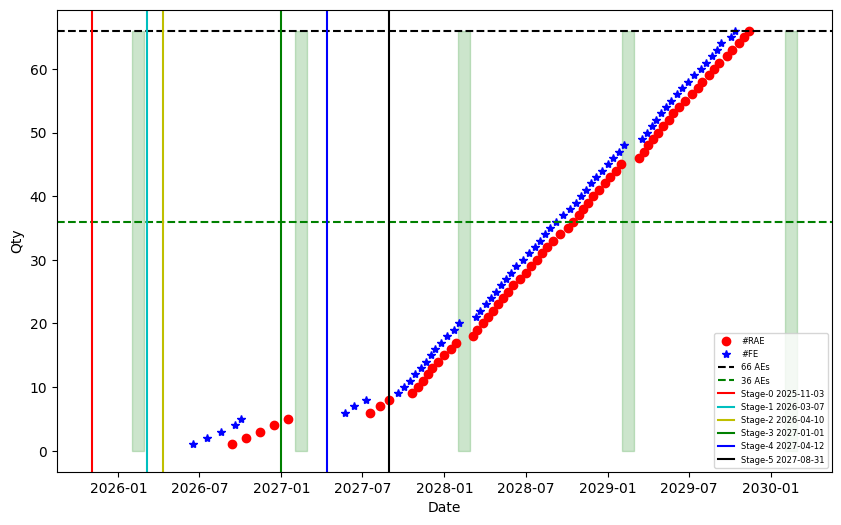

In [37]:
plt.figure(figsize=(10,6))
plt.plot(RAEDeliveryTime,numberOfRAE,'ro',label='#RAE')
plt.plot(FEUpgradedDeliveryTime,numberOfFEUpgraded,'b*',label='#FE')
plt.axhline(66,color='k',ls='--',label='66 AEs')
plt.axhline(36,color='g',ls='--',label='36 AEs')

plt.axvline(stage0.start_date(),color='r',ls='-',label='Stage-0 '+str(stage0.start_date()))
plt.axvline(stage1.start_date(),color='c',ls='-',label='Stage-1 '+str(stage1.start_date()))
plt.axvline(stage2.start_date(),color='y',ls='-',label='Stage-2 '+str(stage2.start_date()))
plt.axvline(stage3.start_date(),color='g',ls='-',label='Stage-3 '+str(stage3.start_date()))
plt.axvline(stage4.start_date(),color='b',ls='-',label='Stage-4 '+str(stage4.start_date()))
plt.axvline(stage5.start_date(),color='k',ls='-',label='Stage-5 '+str(stage5.start_date()))

for year in range(2026,2031):
    plt.fill_between([datetime.date(year, 2, 1),datetime.date(year, 2, 28)], 0, 66, alpha=0.2,color='g')

plt.legend(fontsize="6")
plt.xlabel('Date')
plt.ylabel('Qty')


In [38]:
aiv = gantt.Project(name='AIV')
aiv.add_task(stage0)
aiv.add_task(stage1)
aiv.add_task(stage2)
aiv.add_task(stage3)
aiv.add_task(stage4)
aiv.add_task(stage5)
aiv.add_task(FEUpgrade)
aiv.add_task(atac)

# Human resources demand per day
The purpose of this analysis is to figure out the number of people needed per day, with the final objective of estimating the staffing requirements.

In [39]:
selection=df.loc[(df['Team']=='SC')]

In [40]:
a=planning.createDataFramePerDay(aiv.start_date(),aiv.end_date(),selection)

c=[]
listOfResources=a['Resource'].unique()
for i in listOfResources:
    b=a.loc[a['Resource']==i]
    c.append([i,b['date'].to_list(),b['H/d'].to_list()])
    

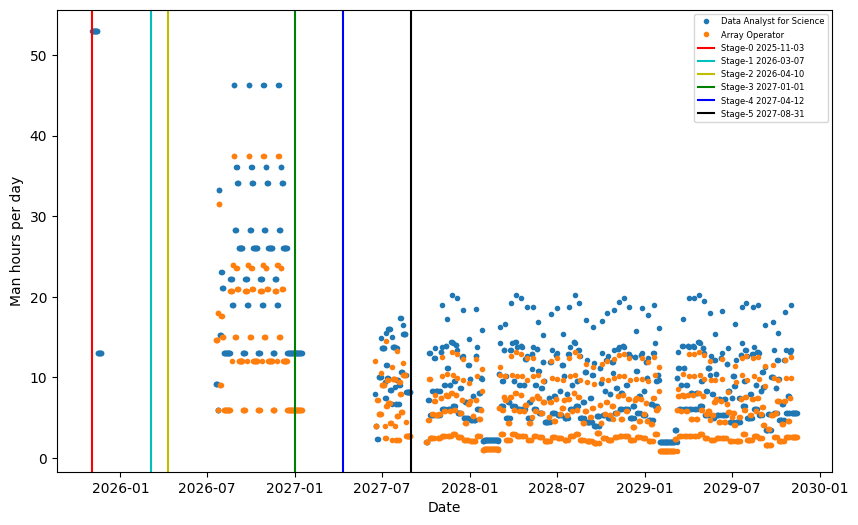

In [41]:
plt.figure(figsize=(10,6))
for i in c:
    plt.plot(i[1],i[2],'.',label=i[0])

plt.xlabel('Date')
plt.ylabel('Man hours per day')

plt.axvline(stage0.start_date(),color='r',ls='-',label='Stage-0 '+str(stage0.start_date()))
plt.axvline(stage1.start_date(),color='c',ls='-',label='Stage-1 '+str(stage1.start_date()))
plt.axvline(stage2.start_date(),color='y',ls='-',label='Stage-2 '+str(stage2.start_date()))
plt.axvline(stage3.start_date(),color='g',ls='-',label='Stage-3 '+str(stage3.start_date()))
plt.axvline(stage4.start_date(),color='b',ls='-',label='Stage-4 '+str(stage4.start_date()))
plt.axvline(stage5.start_date(),color='k',ls='-',label='Stage-5 '+str(stage5.start_date()))
plt.legend(fontsize="6")

# Summary of the Tasks to be done
Create a list of all the AIVC tasks including their estimated efforts, learning and contingency factors in a Wiki format suitable for adding to a confluence page.
In addition this section of the code produces the Latex format tables summarizing the needed efforts (to be added to the LaTex document)

In [42]:
teamColor={    
'EN':'red',
'SC':'green'
}    
teamTitle={
'EN':'Engineering related tasks',
'SC':'DSO related tasks'    
}

original_stdout = sys.stdout
f=open('tasksDescriptionWiki.txt', 'w')
sys.stdout = f

for team in ['EN','SC']:
    tareas=planning.listTasksUnique(aiv)
    a=planning.createEffortDataFrame(tareas)
    b=a.loc[(a['Team']==team)]
    c=b.Description.unique()    
    color=teamColor.get(team)
    print('h1. {color:%s} %s {color}'%(color,teamTitle.get(team)))
    for i in c:
        c=a.loc[(a['Description']==i)]
        tareas=c.Task.unique()
        tareas.sort()
        print()
        print('h2. {color:%s} %s {color}'%(color,i))
        print()
        print('h3. instances')    
        print('||Task ID||Contingency Factor||Learning Factor||')
        for j in tareas:
            print('|%s|%.2f|%.2f|'%(j,planning.ContingencyFactor.get(j),planning.LearningFactor.get(j)))
        print()
        print('h3. Details')
        fileName='./latexTables/'+str(tareas[0])
        planning.createEffortTable(tareas,fileName)

sys.stdout = original_stdout
f.close()        